# Import

In [111]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

# Data Retrieval

In [112]:
#load the csv data in a dataframe
DATA_PATH=".//dataset//TCGA"
DATA_NAME="clinical_data_coad.tsv"

import pandas as pd

def load_raw_data(data_path, data_name):
    csv_path = os.path.join(data_path, data_name)
    return pd.read_csv(csv_path,sep="\t")

df=load_raw_data(DATA_PATH,DATA_NAME)

# Data Info

In [113]:
df.head()

,Study ID,Patient ID,Sample ID,Diagnosis Age,Neoplasm Disease Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Publication Version Type,Aneuploidy Score,Buffa Hypoxia Score,Cancer Type,TCGA PanCanAtlas Cancer Type Acronym,...,9p Status,9q Status,Subtype,Tissue Prospective Collection Indicator,Tissue Retrospective Collection Indicator,Tissue Source Site,Tumor Disease Anatomic Site,Tumor Type,Patient Weight,Winter Hypoxia Score
0,coadread_tcga_pan_can_atlas_2018,TCGA-3L-AA1B,TCGA-3L-AA1B-01,61.0,STAGE I,7TH,19.0,5.0,Colorectal Adenocarcinoma,COAD,...,Not Called,Not Called,COAD_CIN,Yes,No,3L,Colon,Colon Adenocarcinoma,63.300,-12.0
1,coadread_tcga_pan_can_atlas_2018,TCGA-4N-A93T,TCGA-4N-A93T-01,67.0,STAGE IIIB,7TH,13.0,-15.0,Colorectal Adenocarcinoma,COAD,...,Not Called,Not Called,COAD_CIN,Yes,No,4N,Colon,Colon Adenocarcinoma,134.000,-6.0
2,coadread_tcga_pan_can_atlas_2018,TCGA-4T-AA8H,TCGA-4T-AA8H-01,42.0,STAGE IIA,7TH,18.0,15.0,Colorectal Adenocarcinoma,COAD,...,Not Called,Not Called,COAD_CIN,No,Yes,4T,Colon,"Colon Adenocarcinoma, Mucinous Type",107.956,-4.0
3,coadread_tcga_pan_can_atlas_2018,TCGA-5M-AAT4,TCGA-5M-AAT4-01,74.0,STAGE IV,6TH,18.0,35.0,Colorectal Adenocarcinoma,COAD,...,Gained,Not Called,COAD_CIN,No,Yes,5M,Colon,Colon Adenocarcinoma,NaN,32.0
4,coadread_tcga_pan_can_atlas_2018,TCGA-5M-AAT5,TCGA-5M-AAT5-01,NaN,NaN,NaN,10.0,33.0,Colorectal Adenocarcinoma,COAD,...,Not Called,Not Called,COAD_CIN,NaN,NaN,5M,NaN,Colon Adenocarcinoma,NaN,18.0


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 99 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Study ID                                                                                     594 non-null    object 
 1   Patient ID                                                                                   594 non-null    object 
 2   Sample ID                                                                                    594 non-null    object 
 3   Diagnosis Age                                                                                592 non-null    float64
 4   Neoplasm Disease Stage American Joint Committee on Cancer Code                               580 non-null    object 
 5   American Joint Committee on Cancer P

In [115]:
df.pivot_table(index=['Overall Survival Status'],columns=['Patient ID'],values='Overall Survival (Months)')

df['Overall Survival (Months)'].describe()

count    590.000000
mean      27.098807
std       24.463500
min        0.000000
25%       12.238222
50%       21.073742
75%       35.925634
max      148.009337
Name: Overall Survival (Months), dtype: float64

# Feature Select Numeric and Categorical

In [116]:
featDrop=[0,1,2,5,6,12,14,22,23,25,26,27,36]
df_sel=df.drop(df.columns[featDrop],axis=1)

colNum=[]
colCat=[]

#separeta cat and num features
from pandas.api.types import is_numeric_dtype
for colname in df_sel.columns:
    if is_numeric_dtype(df_sel[colname]):
        colNum.append(colname)
    else:
        colCat.append(colname)


#sel Num feat
df_sel_num=df_sel[colNum].copy()

#sel cat feat
df_sel_cat=df_sel[colCat].copy()

In [117]:
df_sel_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 71 columns):
 #   Column                                                                     Non-Null Count  Dtype 
---  ------                                                                     --------------  ----- 
 0   Neoplasm Disease Stage American Joint Committee on Cancer Code             580 non-null    object
 1   Cancer Type                                                                594 non-null    object
 2   TCGA PanCanAtlas Cancer Type Acronym                                       594 non-null    object
 3   Cancer Type Detailed                                                       594 non-null    object
 4   Center of sequencing                                                       594 non-null    object
 5   Disease Free Status                                                        223 non-null    object
 6   Disease-specific Survival status                                  

# Data Cleaning 2 (Numerical: Missing Values and Features Scaling) 

In [118]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler 


#obj imp
imputer = SimpleImputer(strategy='median')

#obj sca
scaler=MinMaxScaler()


#fit imputer
imputer.fit(df_sel_num)
#trans
arr_sel_num_imp=imputer.transform(df_sel_num)
#fit scaling
scaler.fit(arr_sel_num_imp)
feat_sel_num_imp=scaler.transform(arr_sel_num_imp)
df_sel_num_imp=pd.DataFrame(feat_sel_num_imp,columns=df_sel_num.columns)

# Data Cleaning 3 (Missing Value for Categorical Features and OneHotEncoder)

In [119]:
#Fill missing data with None (we don't add extra bias)
df_sel_cat.fillna('None',inplace=True)
df_sel_cat.info()

#remove Overall Survival Status (for classification)
df_status=df_sel_cat['Overall Survival Status'].copy()
df_sel_cat_imp=df_sel_cat.drop('Overall Survival Status',axis=1)


#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

#from cat to ohe
encoderOHE=OneHotEncoder(sparse=False)
encoderOHE.fit(df_sel_cat_imp)
feat_sel_cat=encoderOHE.transform(df_sel_cat_imp)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 71 columns):
 #   Column                                                                     Non-Null Count  Dtype 
---  ------                                                                     --------------  ----- 
 0   Neoplasm Disease Stage American Joint Committee on Cancer Code             594 non-null    object
 1   Cancer Type                                                                594 non-null    object
 2   TCGA PanCanAtlas Cancer Type Acronym                                       594 non-null    object
 3   Cancer Type Detailed                                                       594 non-null    object
 4   Center of sequencing                                                       594 non-null    object
 5   Disease Free Status                                                        594 non-null    object
 6   Disease-specific Survival status                                  

# Train, Val, Test datasets

In [120]:
from sklearn.model_selection import train_test_split
import numpy as np
X=np.concatenate((feat_sel_num_imp, feat_sel_cat), axis=1)
y=df_status

X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2 , random_state = 41)

# Score Func

In [121]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

# Classifier ML Models

# Learning Curve

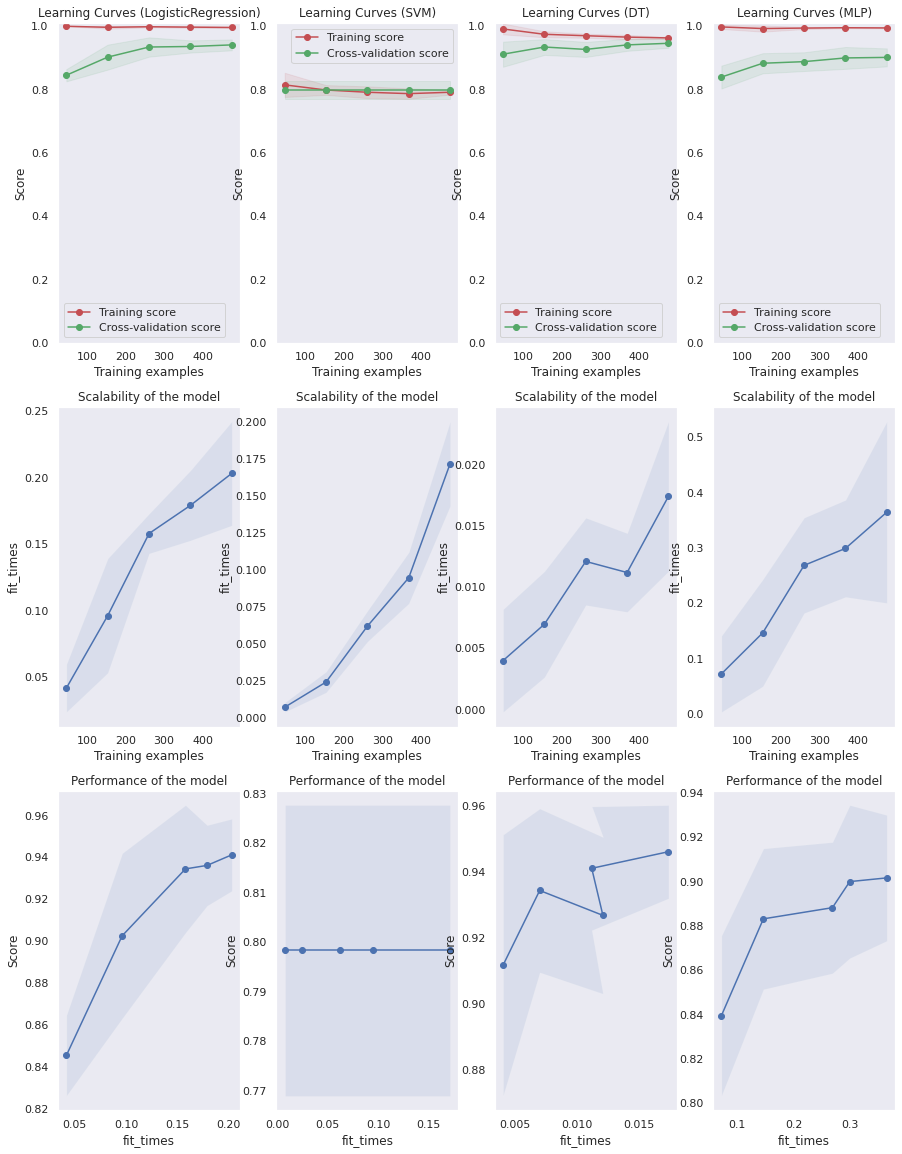

In [122]:

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC as SVM
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

fig, axes = plt.subplots(3, 4, figsize=(15, 20))

title = "Learning Curves (LogisticRegression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)


title = "Learning Curves (SVM)"
estimator = SVM(gamma=0.001)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)


title = "Learning Curves (DT)"
estimator = DecisionTreeClassifier(max_depth=3)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 2], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)


title = "Learning Curves (MLP)"
estimator = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 3), random_state=1)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 3], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [123]:
df['Overall Survival (Months)'].fillna(df['Overall Survival (Months)'].median(),inplace=True)
df['Overall Survival (Months)'].describe()

count    594.000000
mean      27.058234
std       24.385840
min        0.000000
25%       12.369727
50%       21.073742
75%       35.785909
max      148.009337
Name: Overall Survival (Months), dtype: float64

In [124]:
df['Overall Survival Status'].replace("0:LIVING",0,inplace=True)
df['Overall Survival Status'].replace("1:DECEASED",1,inplace=True)

df['Overall Survival Status'].fillna(0,inplace=True)






Text(0.5, 0, 'timeline [months]')

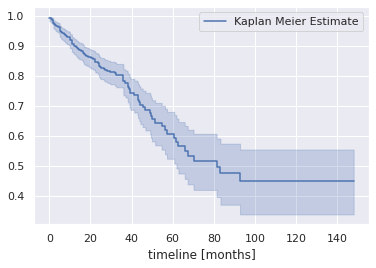

In [125]:
# Python code to create the above Kaplan Meier curve
from lifelines import KaplanMeierFitter

## Example Data 
durations = df['Overall Survival (Months)']
event_observed = df['Overall Survival Status']

## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model
kmf.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate
kmf.plot() ## ci_show is meant for Confidence interval, since our data set is too tiny, thus i am not showing it.
plt.xlabel('timeline [months]')

In [127]:
from lifelines import CoxPHFitter

df_sel_num['Overall Survival Status']=df['Overall Survival Status']

df_sel_dummy=pd.get_dummies(df_sel_num,drop_first=True)

#obj sca
scaler=MinMaxScaler()

#fit imputer
imputer.fit(df_sel_dummy)

#trans
arr_sel_dummy_imp=imputer.transform(df_sel_dummy)

#fit scaling
scaler.fit(arr_sel_dummy_imp)
feat_sel_dummy_imp=scaler.transform(arr_sel_dummy_imp)
df_sel_dummy_imp=pd.DataFrame(feat_sel_dummy_imp,columns=df_sel_dummy.columns)





df_sel_dummy_imp['Overall Survival (Months)']=df['Overall Survival (Months)'].fillna(df['Overall Survival (Months)'].median())




# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(df_sel_dummy_imp, 'Overall Survival (Months)', event_col='Overall Survival Status')   ## Fit the data to train the model
#cph.print_summary()    ## HAve a look at the significance of the features
cph.plot()

ConvergenceError: Convergence halted due to matrix inversion problems. Suspicion is high collinearity. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-modelMatrix is singular.